# Goal
- simple thresholding은 이미지의 픽셀 값을 기준으로 이진화를 수행합니다.

# Simple Thresholding
cv.threshold 함수를 사용하여 이미지를 이진화합니다. 이 함수는 이미지의 각 픽셀을 기준으로 임계값을 설정하고, 픽셀 값이 임계값보다 크면 255로, 작으면 0으로 설정합니다. 
- cv.THRESH_BINARY: 픽셀 값이 임계값보다 크면 255로, 작으면 0으로 설정합니다.
- cv.THRESH_BINARY_INV: 픽셀 값이 임계값보다 크면 0으로, 작으면 255로 설정합니다.
- cv.THRESH_TRUNC: 픽셀 값이 임계값보다 크면 임계값으로, 작으면 그대로 유지합니다.
- cv.THRESH_TOZERO: 픽셀 값이 임계값보다 크면 그대로 유지하고, 작으면 0으로 설정합니다.
- cv.THRESH_TOZERO_INV: 픽셀 값이 임계값보다 크면 0으로, 작으면 그대로 유지합니다.

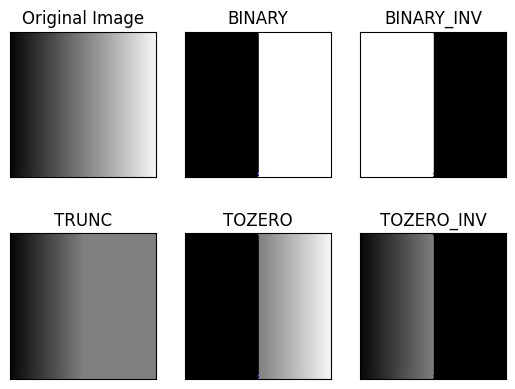

In [1]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img =cv.imread('Images/gradient.png')
assert img is not None, "Image not found"
ret, thresh1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY) # 127보다 크면 255로, 작으면 0으로
ret, thresh2 = cv.threshold(img, 127, 255, cv.THRESH_BINARY_INV) # 127보다 크면 0으로, 작으면 255로
ret, thresh3 = cv.threshold(img, 127, 255, cv.THRESH_TRUNC) # 127보다 크면 127로, 작으면 그대로
ret, thresh4 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO) # 127보다 크면 그대로, 작으면 0으로
ret, thresh5 = cv.threshold(img, 127, 255, cv.THRESH_TOZERO_INV) # 127보다 크면 0으로, 작으면 그대로

titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in range(6):
    plt.subplot(2, 3, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()

## Adaptive Thresholding
위에서는 global value를 사용하여 thresholding을 수행했다. 하지만 이미지의 조명이나 환경에 따라서는 global value를 사용하는 것이 적절하지 않을 수 있다. 이럴 때 adaptive thresholding을 사용한다.
- adaptive method는 threshold value를 계산하는 방법을 지정합니다.
- cv.ADAptive_THRESH_MEAN_C: 주변 픽셀의 평균을 사용
- cv.ADAPTIVE_THRESH_GAUSSIAN_C: 주변 픽셀의 가중치 합을 사용
- block size는 thresholding을 수행할 때 고려할 주변 픽셀의 크기를 지정한다.

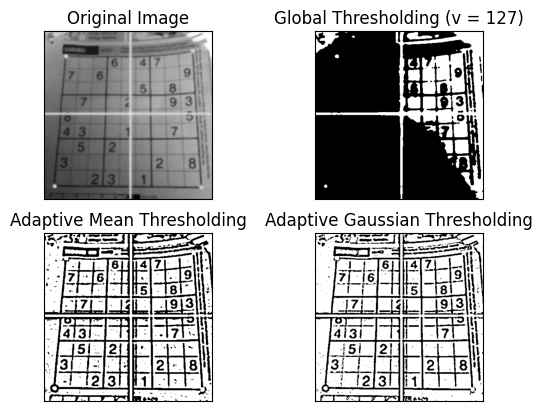

In [2]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Images/sudoku.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"
img = cv.medianBlur(img, 5)

res, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY) # 127보다 크면 255로, 작으면 0으로
th2 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY, 11, 2) # 11x11 이웃의 평균값으로 이진화
th3 = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2) # 11x11 이웃의 가우시안 평균값으로 이진화

titles = ['Original Image', 'Global Thresholding (v = 127)', 'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, th1, th2, th3]

for i in range(4):
    plt.subplot(2, 2, i+1), plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([]), plt.yticks([])
plt.show()


## Otsu's Binarization
global thresholding에서는 사용자가 임계값을 지정해야 했다. 하지만 Otsu's Binarization은 임계값을 자동으로 계산한다. 이 방법은 이미지의 히스토그램을 분석하여 bimodal image에서 임계값을 찾는다.
이미지의 두 개의 클래스를 가장 잘 구분하는 임계값을 찾는다.
cv.threshold 함수의 type에 cv.THRESH_OTSU를 지정하면 이 방법을 사용할 수 있다.

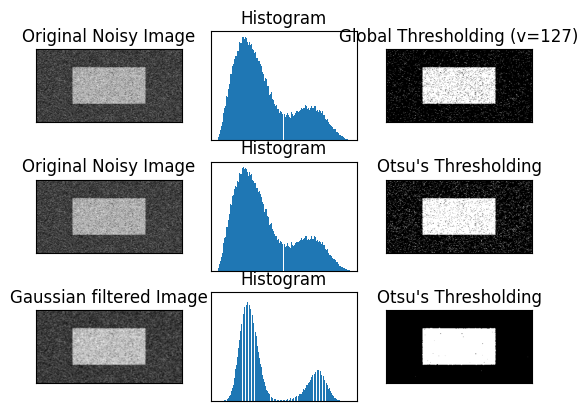

In [5]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt

img = cv.imread('Images/noisy2.png', cv.IMREAD_GRAYSCALE)
assert img is not None, "Image not found"

# global thresholding
ret1, th1 = cv.threshold(img, 127, 255, cv.THRESH_BINARY) # 127보다 크면 255로, 작으면 0으로

# Otsu's thresholding
ret2, th2 = cv.threshold(img, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # 자동으로 최적의 임계값을 찾아줌

# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img, (5, 5), 0)
ret3, th3 = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# plot all the images and their histograms
images = [img, 0, th1, img, 0, th2, blur, 0, th3]
titles = ['Original Noisy Image', 'Histogram', 'Global Thresholding (v=127)', 'Original Noisy Image', 'Histogram', "Otsu's Thresholding", 'Gaussian filtered Image', 'Histogram', "Otsu's Thresholding"]

for i in range(3):
    plt.subplot(3, 3, i*3+1), plt.imshow(images[i*3], 'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+2), plt.hist(images[i*3].ravel(), 256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3, 3, i*3+3), plt.imshow(images[i*3+2], 'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

## How does Otsu's Binarization work?
Otsu 알고리즘은 이미지의 히스토그램을 분석하여 임계값을 찾는다. 이미지의 픽셀 값이 bimodal distribution을 따른다고 가정하면, 두 개의 클래스를 가장 잘 구분하는 임계값을 찾는다. 이 때, 두 클래스의 분산이 최소가 되는 임계값을 찾는다. weight within class variance를 최소화하는 임계값을 찾는다.

In [7]:
img = cv.imread('Images/noisy2.png', cv.IMREAD_GRAYSCALE)
assert isinstance(img, np.ndarray), "Image not found"

blur = cv.GaussianBlur(img, (5, 5), 0)

# find normalized_histogram, and its cumulative distribution function
hist = cv.calcHist([blur], [0], None, [256], [0, 256]) # 히스토그램 계산
hist_norm = hist.ravel()/hist.max() # 정규화
Q = hist_norm.cumsum() # 누적합

bins = np.arange(256) # 각 픽셀값에 대한 배열

fn_min = np.inf # 최소값 초기화
thresh = -1 # 임계값 초기화

for i in range(1, 256):
    p1, p2 = np.hsplit(hist_norm, [i]) # 누적합을 기준으로 분할
    q1, q2 = Q[i], Q[255]-Q[i] # 누적합을 기준으로 분할
    if q1 < 1.e-6 or q2 < 1.e-6:
        continue
    b1, b2 = np.hsplit(bins, [i]) # 픽셀값을 기준으로 분할
    
    # finding means and variances
    m1, m2 = np.sum(p1*b1)/q1, np.sum(p2*b2)/q2 # 평균 계산
    v1, v2 = np.sum(((b1-m1)**2)*p1)/q1, np.sum(((b2-m2)**2)*p2)/q2 # 분산 계산
    
    # calculates the minimization function
    fn = v1*q1 + v2*q2 # 최소값 계산
    if fn < fn_min:
        fn_min = fn
        thresh = i

# find otsu's threshold value with OpenCV function
ret, otsu = cv.threshold(blur, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU) # 자동으로 최적의 임계값을 찾아줌
print( "{} {}".format(thresh, ret) ) # 수동으로 찾은 임계값과 OpenCV 함수로 찾은 임계값 출력

118 117.0
